In [1]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
import citipy
from citipy import citipy
from datetime import datetime



In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats, lngs))
lat_lngs

[(-67.62122269703427, -57.79020967926449),
 (47.53960430138213, 60.57383171050776),
 (0.41520893556763383, -7.131371432792406),
 (60.8084036460275, -17.646069068277342),
 (36.770038551005086, 172.45377685724554),
 (7.71615852008199, 127.56873071432898),
 (-8.439969389647942, -101.9088608358886),
 (-76.06517432949789, 157.82188236779638),
 (60.68164755234045, 170.3583485517555),
 (-38.63186000568818, 40.71444519308565),
 (86.27136074636556, -18.951347428776074),
 (-51.30504687328074, -36.01858316340187),
 (-35.38310550339265, 56.39107101552929),
 (-13.23434950404257, 24.67937072155587),
 (-15.403897179001461, -69.2917282101887),
 (75.00298066365784, -176.41276096479777),
 (21.675747813805273, -82.38379009708514),
 (-36.565216443834174, 179.11313369551556),
 (-18.028432057271857, 26.909830900513015),
 (53.739980123341724, -142.1081912794941),
 (40.30839004548318, -29.657845480307344),
 (-76.30787855973037, 113.94634694113142),
 (52.82962381902206, 157.7377958286532),
 (79.70968309188669,

In [3]:
lat_lngs[0][1]

-57.79020967926449

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [5]:
# Starting URL for Weather Map API Call.

url = f"https://api.openweathermap.org/data/2.5/weather?q={cities[0]}&appid={weather_api_key}&units=imperial"

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | kazalinsk
City not found. Skipping...
Processing Record 3 of Set 1 | harper
Processing Record 4 of Set 1 | vestmannaeyjar
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | kinablangan
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | tilichiki
Processing Record 10 of Set 1 | margate
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | chuy
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | kalengwa
Processing Record 15 of Set 1 | putina
Processing Record 16 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 17 of Set 1 | santa fe
Processing Record 18 of Set 1 | ruatoria
City not found. Skipping...
Processing Record 19 of Set 1 | hwange
Processing Recor

Processing Record 35 of Set 4 | santa cruz
Processing Record 36 of Set 4 | inirida
Processing Record 37 of Set 4 | coihaique
Processing Record 38 of Set 4 | tasiilaq
Processing Record 39 of Set 4 | namibe
Processing Record 40 of Set 4 | nanortalik
Processing Record 41 of Set 4 | isangel
Processing Record 42 of Set 4 | piacabucu
Processing Record 43 of Set 4 | bethel
Processing Record 44 of Set 4 | nakamura
Processing Record 45 of Set 4 | bengkulu
Processing Record 46 of Set 4 | nome
Processing Record 47 of Set 4 | balsas
Processing Record 48 of Set 4 | henties bay
Processing Record 49 of Set 4 | kruisfontein
Processing Record 50 of Set 4 | husavik
Processing Record 1 of Set 5 | severo-kurilsk
Processing Record 2 of Set 5 | zhicheng
Processing Record 3 of Set 5 | upernavik
Processing Record 4 of Set 5 | georgetown
Processing Record 5 of Set 5 | pacific grove
Processing Record 6 of Set 5 | spornoye
Processing Record 7 of Set 5 | moche
Processing Record 8 of Set 5 | neiafu
Processing Reco

Processing Record 26 of Set 8 | sangar
Processing Record 27 of Set 8 | shenjiamen
Processing Record 28 of Set 8 | the valley
Processing Record 29 of Set 8 | codrington
Processing Record 30 of Set 8 | katsuura
Processing Record 31 of Set 8 | quatre cocos
Processing Record 32 of Set 8 | mezen
Processing Record 33 of Set 8 | la orilla
Processing Record 34 of Set 8 | karaul
City not found. Skipping...
Processing Record 35 of Set 8 | dongkan
Processing Record 36 of Set 8 | natal
Processing Record 37 of Set 8 | krasnovishersk
Processing Record 38 of Set 8 | adrar
Processing Record 39 of Set 8 | tabuk
Processing Record 40 of Set 8 | emerald
Processing Record 41 of Set 8 | college
Processing Record 42 of Set 8 | slave lake
Processing Record 43 of Set 8 | donaueschingen
Processing Record 44 of Set 8 | chumikan
Processing Record 45 of Set 8 | deori khas
Processing Record 46 of Set 8 | kuna
Processing Record 47 of Set 8 | bac lieu
Processing Record 48 of Set 8 | sabha
Processing Record 49 of Set 

Processing Record 16 of Set 12 | narragansett
Processing Record 17 of Set 12 | biloela
Processing Record 18 of Set 12 | hofn
Processing Record 19 of Set 12 | toppenish
Processing Record 20 of Set 12 | mme
City not found. Skipping...
Processing Record 21 of Set 12 | burnie
Processing Record 22 of Set 12 | klaksvik
Processing Record 23 of Set 12 | komsomolskiy
Processing Record 24 of Set 12 | anadyr
Processing Record 25 of Set 12 | praia da vitoria
Processing Record 26 of Set 12 | hihifo
City not found. Skipping...
Processing Record 27 of Set 12 | charters towers
Processing Record 28 of Set 12 | pahrump
Processing Record 29 of Set 12 | mpraeso
Processing Record 30 of Set 12 | warqla
City not found. Skipping...
Processing Record 31 of Set 12 | kyra
Processing Record 32 of Set 12 | marinette
Processing Record 33 of Set 12 | oda
Processing Record 34 of Set 12 | kholm-zhirkovskiy
Processing Record 35 of Set 12 | ankazoabo
Processing Record 36 of Set 12 | angoche
Processing Record 37 of Set 1

In [7]:
len(city_data)

574

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,44.26,76,40,19.57,AR,2021-08-12 03:41:28
1,Harper,4.3750,-7.7169,77.27,81,100,12.08,LR,2021-08-12 03:45:55
2,Vestmannaeyjar,63.4427,-20.2734,54.73,81,99,8.55,IS,2021-08-12 03:45:55
3,Nikolskoye,59.7035,30.7861,57.02,72,100,5.01,RU,2021-08-12 03:45:56
4,Kinablangan,7.6947,126.5503,85.93,65,34,6.80,PH,2021-08-12 03:45:57
5,Puerto Ayora,-0.7393,-90.3518,69.55,88,94,5.99,EC,2021-08-12 03:45:57
6,Bluff,-46.6000,168.3333,60.80,70,100,17.40,NZ,2021-08-12 03:45:58
7,Tilichiki,60.4667,166.1000,66.81,49,16,6.82,RU,2021-08-12 03:45:58
8,Margate,51.3813,1.3862,60.69,87,100,10.36,GB,2021-08-12 03:45:59
9,Chuy,-33.6971,-53.4616,41.61,86,5,3.13,UY,2021-08-12 03:45:59


In [9]:
# Reorder the columns.

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head()



,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-08-12 03:41:28,-54.8000,-68.3000,44.26,76,40,19.57
1,Harper,LR,2021-08-12 03:45:55,4.3750,-7.7169,77.27,81,100,12.08
2,Vestmannaeyjar,IS,2021-08-12 03:45:55,63.4427,-20.2734,54.73,81,99,8.55
3,Nikolskoye,RU,2021-08-12 03:45:56,59.7035,30.7861,57.02,72,100,5.01
4,Kinablangan,PH,2021-08-12 03:45:57,7.6947,126.5503,85.93,65,34,6.80


In [10]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

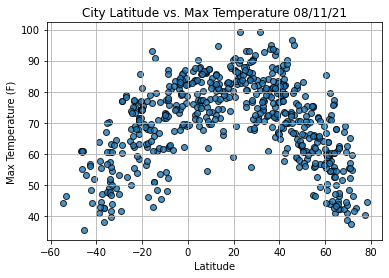

In [13]:
# Import time module.

import time

# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
           max_temps,
           edgecolor = "black",
           linewidths = 1,
           marker = "o",
           alpha = 0.8,
           label = "Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.

plt.show()

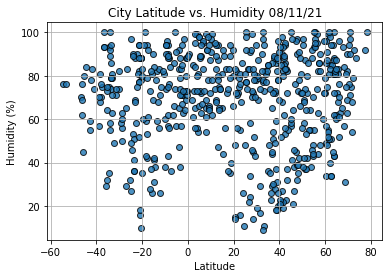

In [14]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()

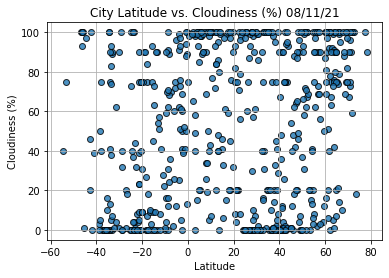

In [15]:
# Build the scatter plots for latitude vs. cloudiness.

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()